In [1]:
import env
import os
import wrangle as w
import modeling as m
#import modeling as m
#import evaluate as e
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")
# Array and Dataframes
import numpy as np
import pandas as pd
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler

In [2]:
### DELIMIT COLUMNS SHOWED ###
pd.set_option('display.max_columns', None)

In [3]:
zillow = w.zillow()

File exists, pulling from system.


In [4]:
zillow.head()

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,sq_feet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,county,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,Orange,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,Ventura,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,Orange,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,LA,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,NaN,NaN,NaN
4,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,NaN,NaN,2962.0,2962.0,NaN,NaN,NaN,NaN,LA,NaN,3.0,NaN,NaN,NaN,2.0,34145202.0,-118179824.0,63000.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,PSR2,6.037461e+07,47019.0,3101.0,274684.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1950.0,NaN,NaN,276684.0,773303.0,2016.0,496619.0,9516.26,NaN,NaN,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,NaN,NaN,NaN


In [5]:
zillow = w.handle_missing_values(zillow,column_percent=.4,row_percent=.4)

In [6]:
zillow.head()

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,sq_feet,finishedsquarefeet12,finishedsquarefeet50,finishedsquarefeet6,county,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,NaN,NaN,NaN,3.5,4.0,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,Orange,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,2.0,NaN,1.0,NaN,1465.0,1465.0,1465.0,1465.0,NaN,Ventura,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2.0,3.0,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,Orange,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,4.0,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,LA,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,Central,NaN,NaN
4,1.0,NaN,NaN,3.0,4.0,9.0,3.0,NaN,NaN,2962.0,2962.0,NaN,NaN,LA,NaN,3.0,NaN,NaN,NaN,2.0,34145202.0,-118179824.0,63000.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,PSR2,6.037461e+07,47019.0,3101.0,274684.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1950.0,NaN,NaN,276684.0,773303.0,2016.0,496619.0,9516.26,NaN,NaN,6.037461e+13,-0.001011,2017-01-01,Central,NaN,Central,NaN,NaN


In [7]:
train, validate, test = w.splitter(zillow)

Dataframe: (52199, 61) 100%
Train: (33407, 61) | ~60%
Validate: (8352, 61) | ~20%
Test: (10440, 61) | ~20%


In [8]:
w.summarize(train)

=====   SHAPE   =====
(33407, 61)
=====   INFO   =====
<class 'pandas.core.frame.DataFrame'>
Index: 33407 entries, 46499 to 5060
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   airconditioningtypeid       8737 non-null   float64
 1   architecturalstyletypeid    47 non-null     float64
 2   basementsqft                33 non-null     float64
 3   bathroomcnt                 33407 non-null  float64
 4   bedroomcnt                  33407 non-null  float64
 5   buildingqualitytypeid       21602 non-null  float64
 6   calculatedbathnbr           33386 non-null  float64
 7   decktypeid                  227 non-null    float64
 8   finishedfloor1squarefeet    2690 non-null   float64
 9   sq_feet                     33407 non-null  float64
 10  finishedsquarefeet12        33310 non-null  float64
 11  finishedsquarefeet50        2690 non-null   float64
 12  finishedsquarefeet6         97 non-

# Explore

## Questions:
1. Is there a relationship between log error & sq feet?
2. What amount of bedrooms provides the best results when compared to log error?
3. Does garagetotalsqft lead to a better logerror score?
4. Does the floors of a house lead to a better log score?
5. Could county help determine logerror?

In [9]:
loge_q1, loge_q3 = train['logerror'].quantile([.25,.75])

In [10]:
train['log_cats'] = pd.cut(train.logerror,[train.logerror.min(),loge_q1,loge_q3,train.logerror.max()], labels = ['bad','gooder','good'])

In [11]:
train['log_cats'].value_counts()

log_cats
gooder    16703
good       8352
bad        8351
Name: count, dtype: int64

In [12]:
explore_col = ['bedroomcnt','numberofstories']
area_col = ['garagetotalsqft','sq_feet']

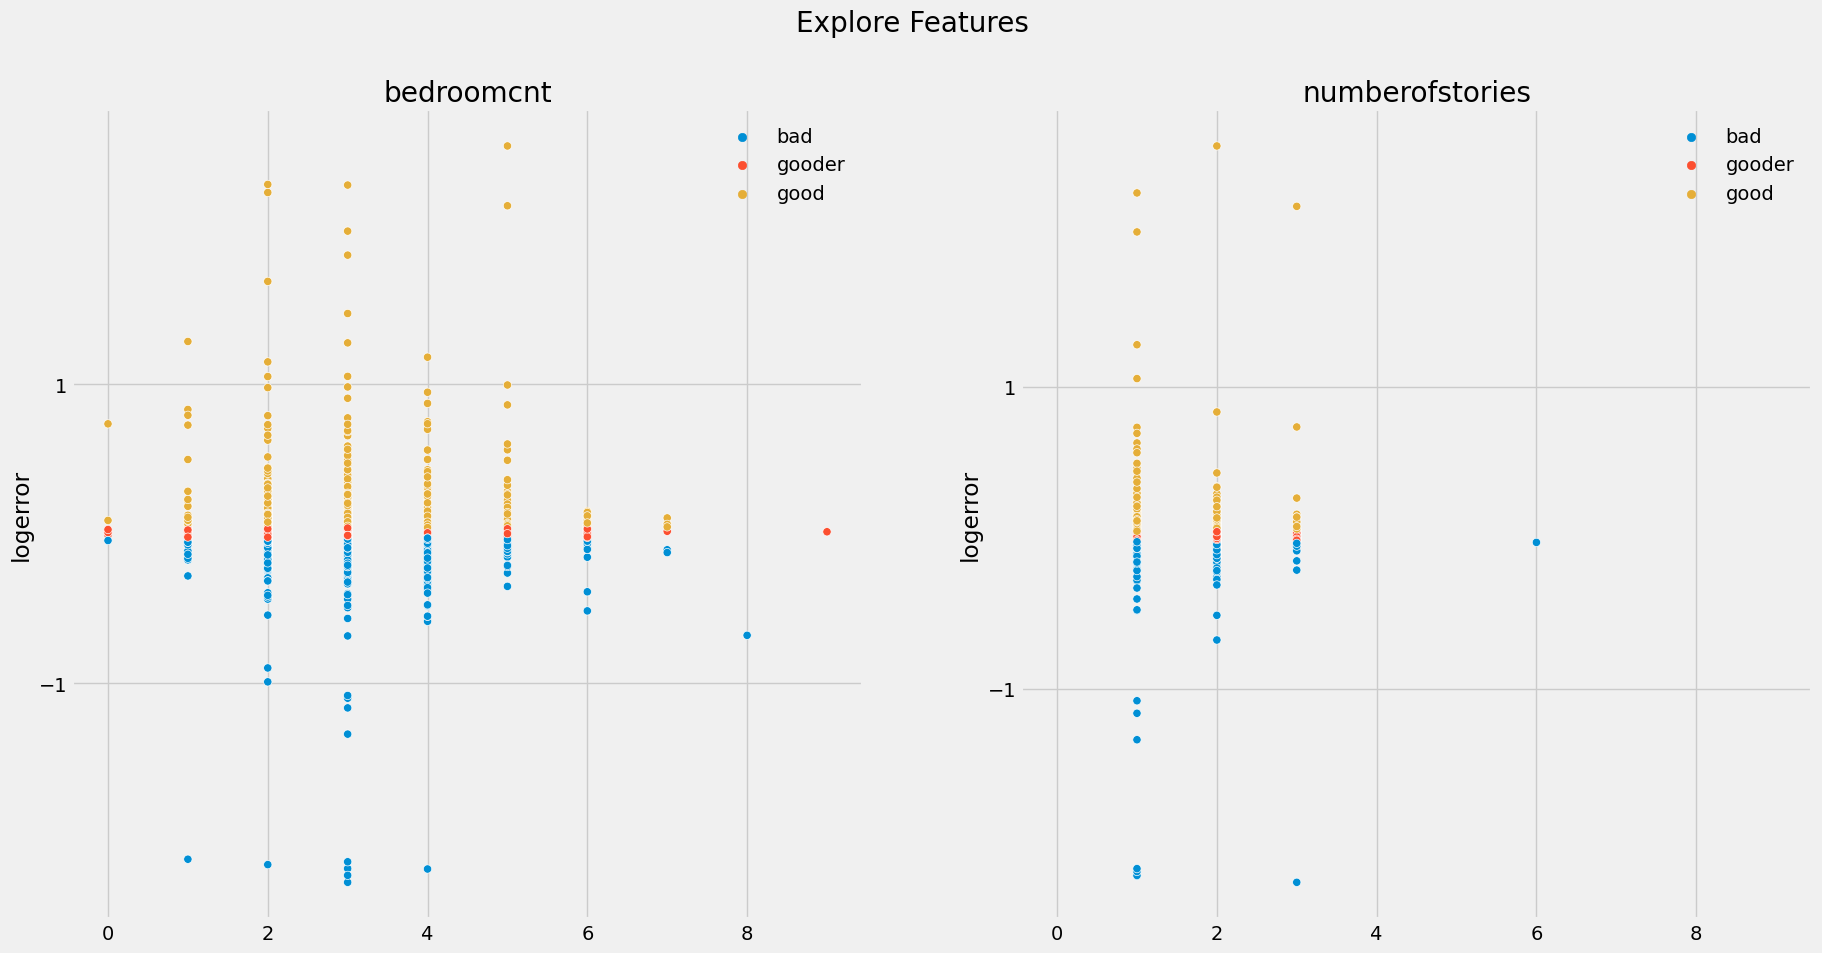

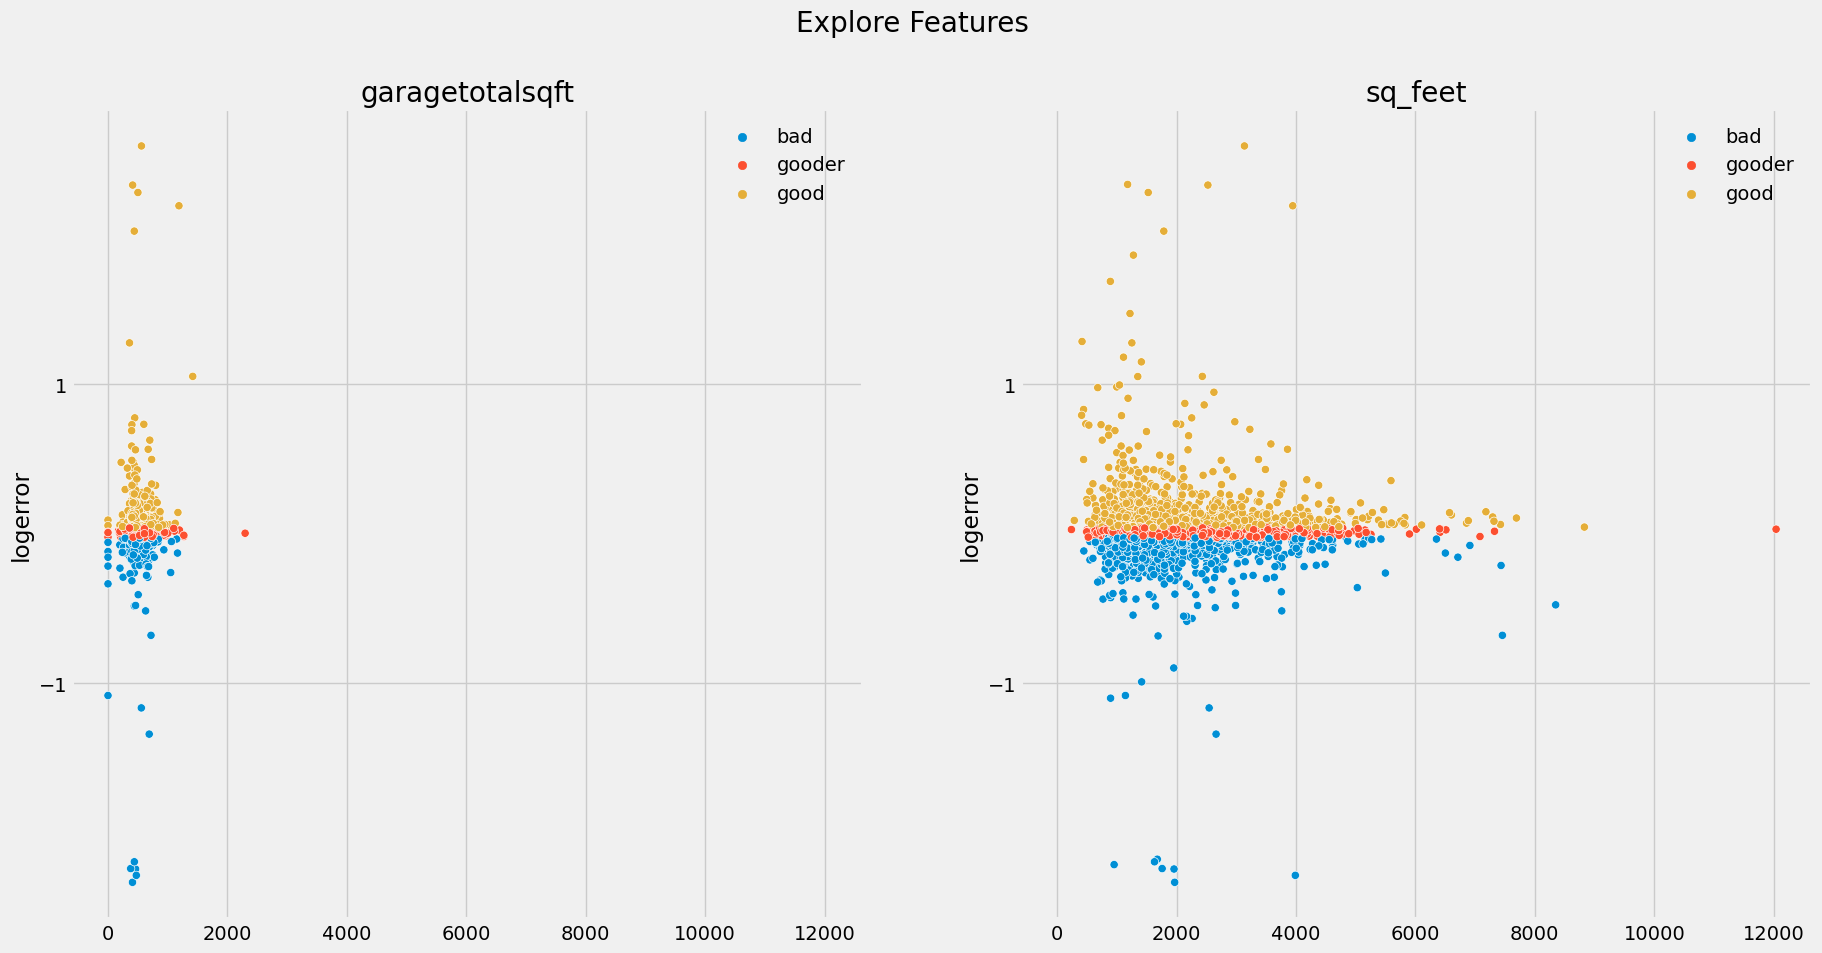

In [13]:
viz = train.sample(5000)

dimensions = (20,10)
fig, axs = plt.subplots(1,2, figsize=dimensions, sharex=True)
plt.suptitle('Explore Features',fontsize=20)
for col, ax in zip(explore_col, axs):
    sns.scatterplot(data=viz, x=col, y='logerror', ax=ax, hue='log_cats')
    ax.set_yticks([-1,1])
    ax.set_xlabel(None)
    ax.set_title(label=col)
    ax.legend(frameon=False)

dimensions = (20,10)
fig, axs = plt.subplots(1,2, figsize=dimensions, sharex=True)
plt.suptitle('Explore Features',fontsize=20)
for col, ax in zip(area_col, axs):
    sns.scatterplot(data=viz, x=col, y='logerror', ax=ax, hue='log_cats')
    ax.set_yticks([-1,1])
    ax.set_xlabel(None)
    ax.set_title(label=col)
    ax.legend(frameon=False)

# for ax, col in zip(axs[1],explore_col):
#     sns.swarmplot(data= viz, x=col, y='logerror', ax=ax, hue='log_cats')
#     ax.set_xlabel(None)
#     ax.set_legend(frameon=False)

# for ax, col in zip(axs[1],explore_col):
#     sns.boxplot(data=viz, x=col, y='logerror', ax=ax,hue='log_cats')
#     ax.legend(frameon=False)
plt.show()

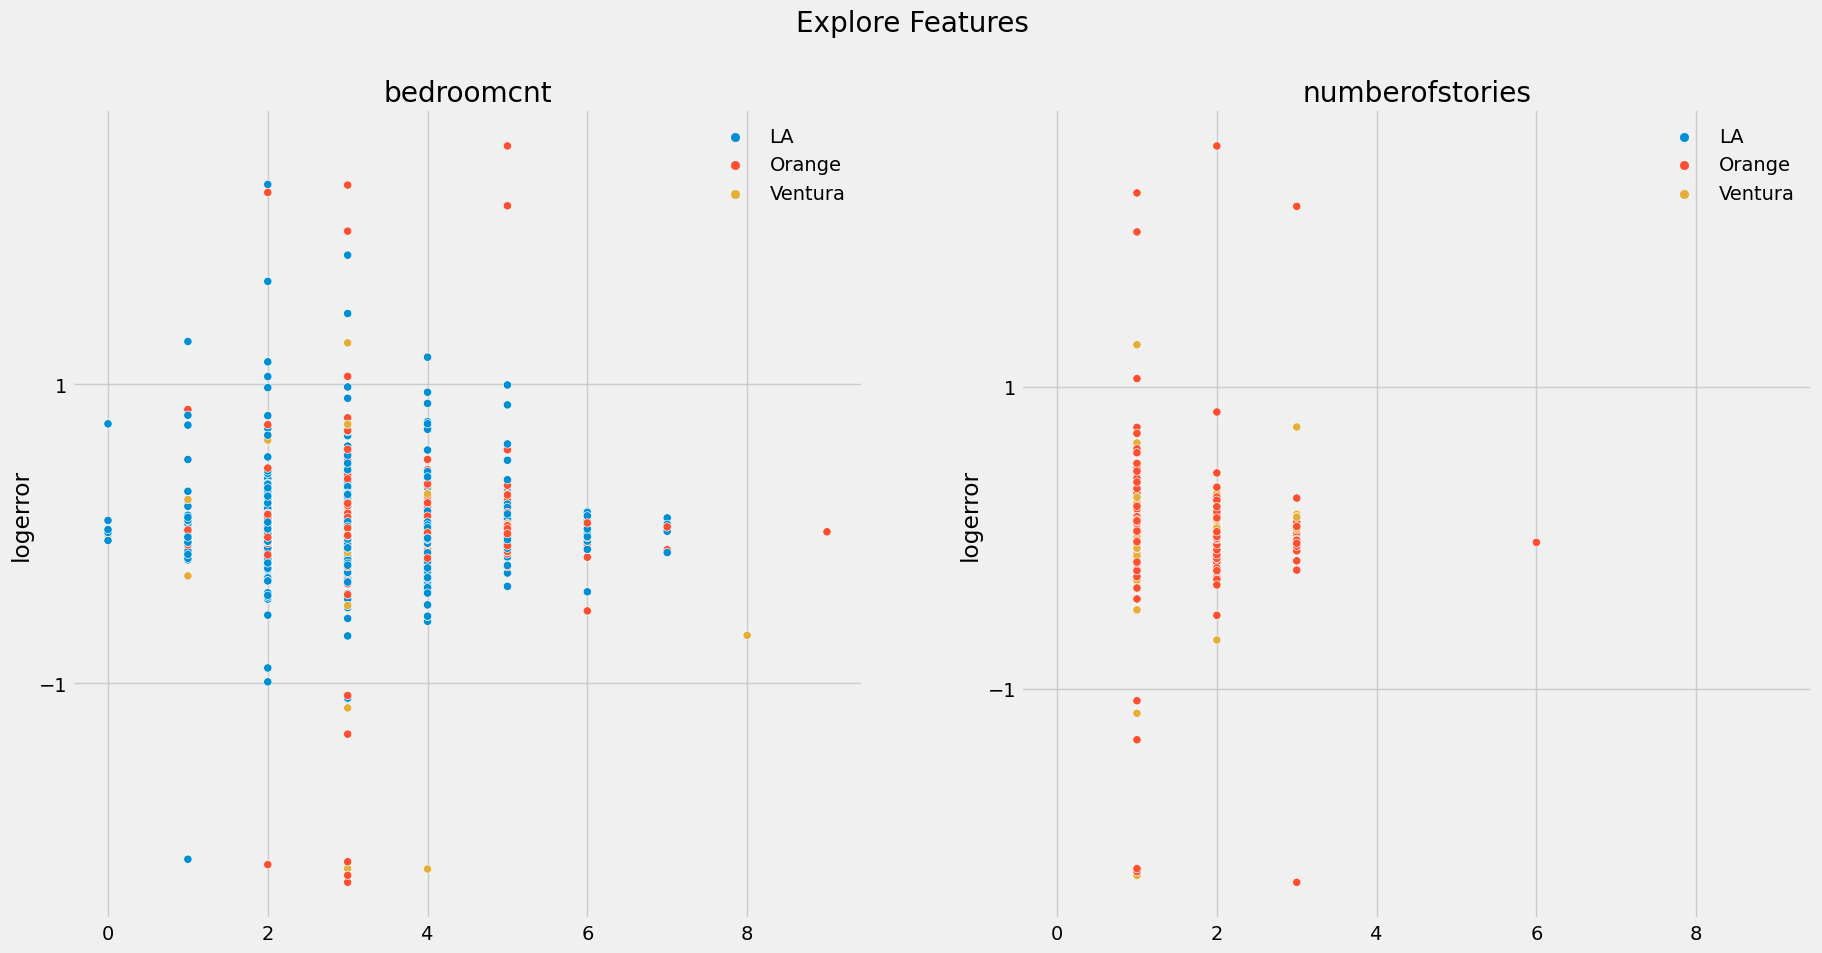

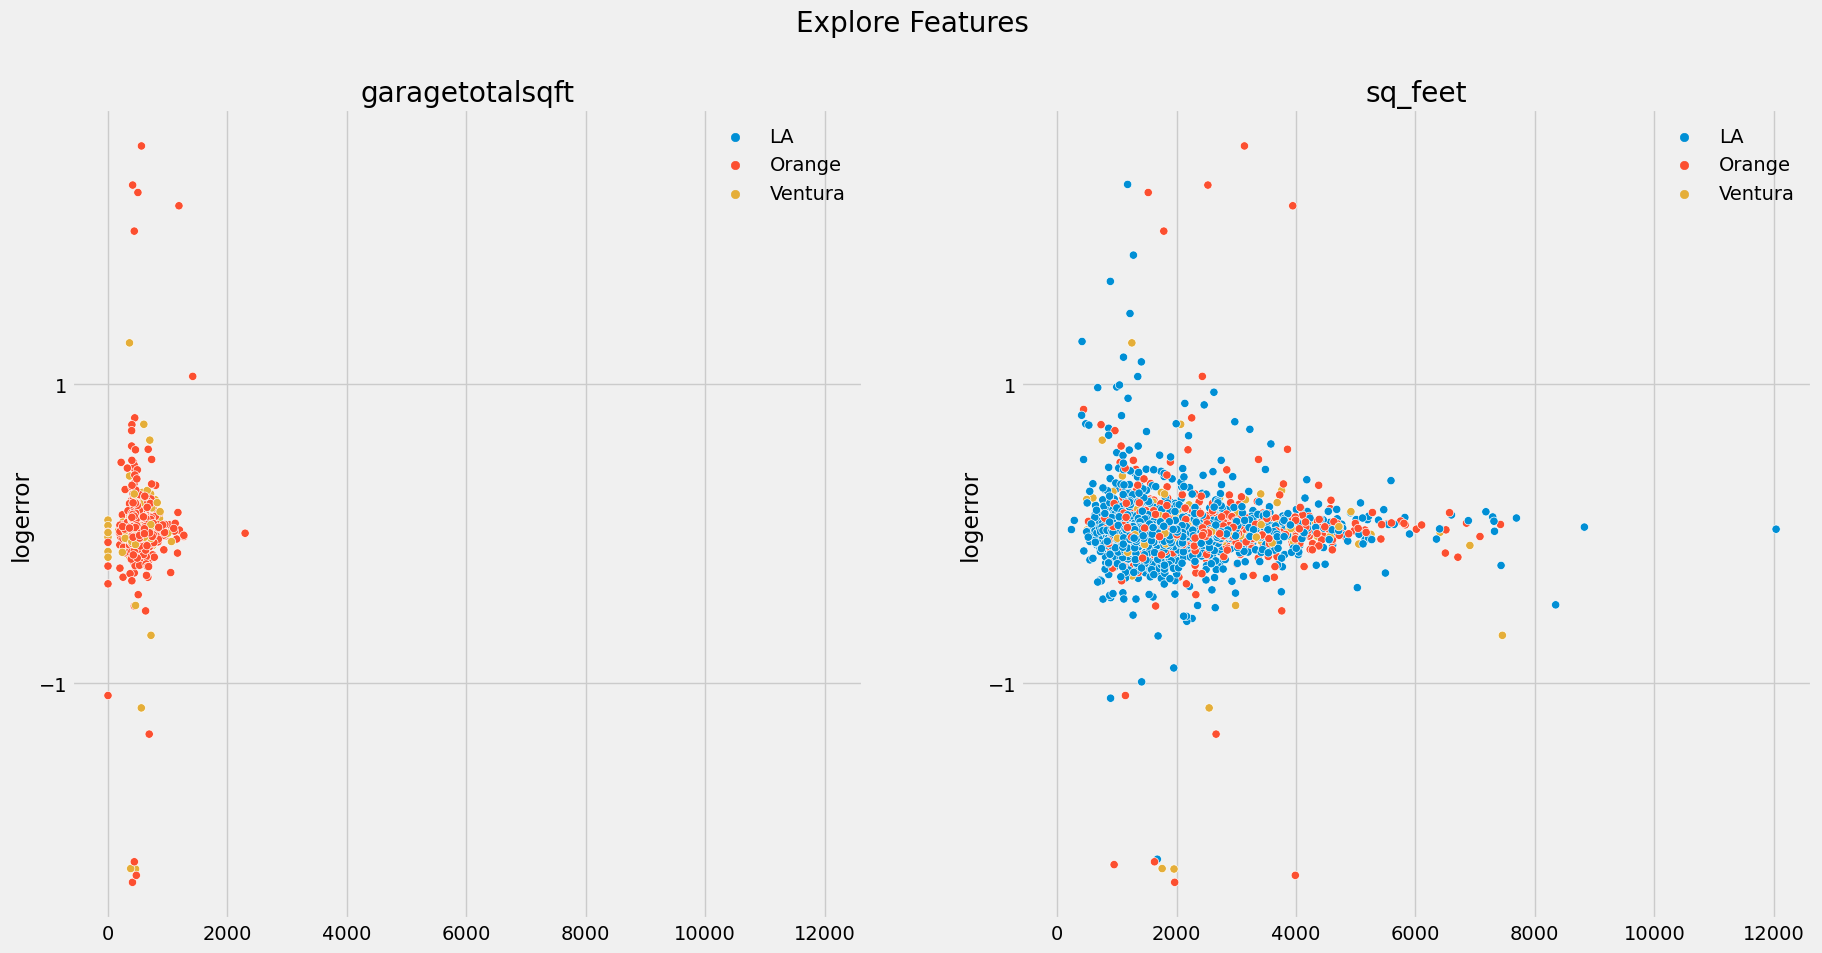

In [14]:
dimensions = (20,10)
fig, axs = plt.subplots(1,2, figsize=dimensions, sharex=True)
plt.suptitle('Explore Features',fontsize=20)
for col, ax in zip(explore_col, axs):
    sns.scatterplot(data=viz, x=col, y='logerror', ax=ax, hue='county')
    ax.set_yticks([-1,1])
    ax.set_xlabel(None)
    ax.set_title(label=col)
    ax.legend(frameon=False)

dimensions = (20,10)
fig, axs = plt.subplots(1,2, figsize=dimensions, sharex=True)
plt.suptitle('Explore Features',fontsize=20)
for col, ax in zip(area_col, axs):
    sns.scatterplot(data=viz, x=col, y='logerror', ax=ax, hue='county')
    ax.set_yticks([-1,1])
    ax.set_xlabel(None)
    ax.set_title(label=col)
    ax.legend(frameon=False)

<Axes: xlabel='county', ylabel='count'>

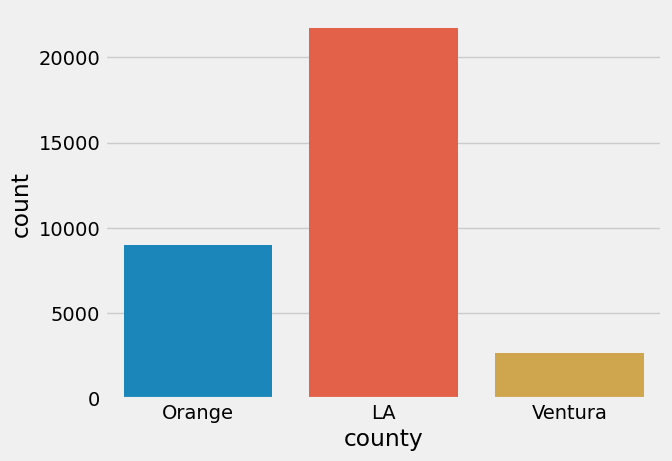

In [15]:
sns.countplot(data=train,x='county')

In [16]:
train.head()

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,sq_feet,finishedsquarefeet12,finishedsquarefeet50,finishedsquarefeet6,county,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,heatingorsystemdesc,storydesc,typeconstructiondesc,log_cats
46499,5.0,NaN,NaN,2.5,5.0,NaN,2.5,NaN,NaN,2209.0,2209.0,NaN,NaN,Orange,1.0,2.0,1.0,399.0,NaN,6.0,33706903.0,-118013365.0,5978.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059099e+07,25218.0,1286.0,NaN,96965.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1967.0,2.0,NaN,161365.0,464717.0,2016.0,303352.0,5266.58,NaN,NaN,6.059099e+13,-0.036157,2017-08-22,NaN,NaN,Forced air,NaN,NaN,bad
46770,NaN,NaN,NaN,2.0,2.0,8.0,2.0,NaN,NaN,1352.0,1352.0,NaN,NaN,LA,NaN,2.0,NaN,NaN,NaN,2.0,34035640.0,-118418719.0,6857.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037269e+07,12447.0,3101.0,403142.0,96045.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1951.0,NaN,NaN,49678.0,105157.0,2016.0,55479.0,1392.48,NaN,NaN,6.037269e+13,-0.192916,2017-08-23,NaN,NaN,Central,NaN,NaN,bad
24570,NaN,NaN,NaN,3.0,5.0,8.0,3.0,NaN,NaN,1956.0,1956.0,NaN,NaN,LA,NaN,3.0,NaN,NaN,NaN,2.0,33804797.0,-118370864.0,7205.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,TORR-LO,6.037651e+07,54722.0,3101.0,NaN,96163.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1955.0,NaN,NaN,237392.0,605621.0,2016.0,368229.0,6973.35,NaN,NaN,6.037651e+13,-0.057387,2017-05-16,NaN,NaN,Central,NaN,NaN,bad
19238,NaN,NaN,NaN,2.5,3.0,NaN,2.5,NaN,NaN,1529.0,1529.0,NaN,NaN,Orange,NaN,2.0,2.0,488.0,NaN,NaN,33654160.0,-117567915.0,5000.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059032e+07,NaN,1286.0,NaN,96989.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1987.0,NaN,NaN,135403.0,244356.0,2016.0,108953.0,2536.50,NaN,NaN,6.059032e+13,0.008914,2017-04-21,NaN,NaN,NaN,NaN,NaN,gooder
49948,NaN,NaN,NaN,2.5,2.0,NaN,2.5,NaN,NaN,2141.0,2141.0,NaN,NaN,Orange,NaN,2.0,2.0,456.0,NaN,NaN,33787648.0,-117763823.0,4500.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059076e+07,33252.0,1286.0,NaN,97067.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1989.0,NaN,NaN,250354.0,470966.0,2016.0,220612.0,5850.94,NaN,NaN,6.059076e+13,0.059899,2017-09-06,NaN,NaN,NaN,NaN,NaN,good


<Axes: xlabel='regionidzip'>

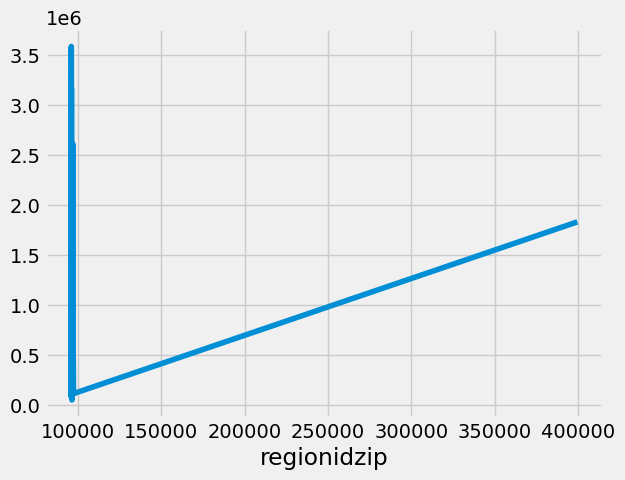

In [17]:
train.groupby(['regionidzip'])['tax_value'].mean().plot()

Lat Long Mapped

In [34]:
bbox = ((train.longitude.min(),   train.longitude.max(),      
         train.latitude.min(), train.latitude.max()))
bbox

(-119475416.0, -117554636.0, 33341224.0, 34818767.0)

In [35]:
la = plt.imread('/Users/jer/codeup-data-science/clustering-exercises/map.png',format='png')

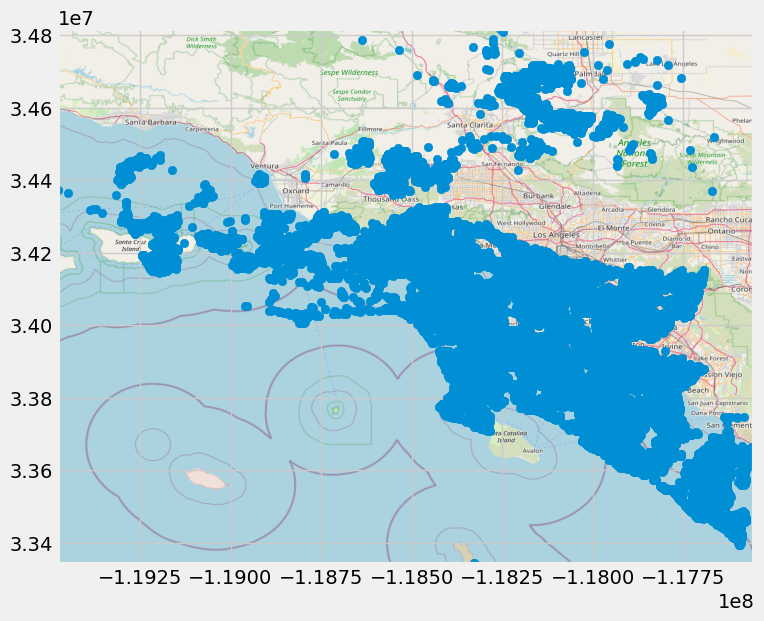

In [39]:
fix, ax = plt.subplots(figsize = (8,7))
ax.scatter(train.longitude, train.latitude, zorder=1)
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])

ax.imshow(la,zorder=0,extent=bbox, aspect='equal')

# Mall Customers

1. Acquire data from the customers table in the mall_customers database.

In [20]:
mall = w.mall()

File exists, pulling from system.


In [21]:
w.summarize(mall)

=====   SHAPE   =====
(200, 5)
=====   INFO   =====
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB
None
=====   DESCRIBE   =====
|                |   count |   mean |     std |   min |   25% |   50% |    75% |   max |
|:---------------|--------:|-------:|--------:|------:|------:|------:|-------:|------:|
| customer_id    |     200 | 100.5  | 57.8792 |     1 | 50.75 | 100.5 | 150.25 |   200 |
| age            |     200 |  38.85 | 13.969  |    18 | 28.75 |  36   |  49    |    70 |
| annual_income  |     200 |  60.56 | 26.2647 |    15 | 41.5  |  61.5 |  78    |   137 |
| spending_score

In [22]:
age_q1, age_q3 = mall['age'].quantile([.25,.75])

In [23]:
age_iqr = age_q3 - age_q1

In [24]:
age_upper = age_q3 * 1.5
age_lower = age_q1 * 1.5

In [25]:
mall[mall['age'] > age_upper]

,customer_id,gender,age,annual_income,spending_score


In [26]:
mall_train, mall_validate, mall_test = w.splitter(mall)

Dataframe: (200, 5) 100%
Train: (128, 5) | ~60%
Validate: (32, 5) | ~20%
Test: (40, 5) | ~20%


In [27]:
mall_train = pd.get_dummies(mall_train, drop_first=True)
mall_train

,customer_id,age,annual_income,spending_score,gender_Male
129,130,38,71,75,True
190,191,34,103,23,False
35,36,21,33,81,False
130,131,47,71,9,True
147,148,32,77,74,False
...,...,...,...,...,...
157,158,30,78,78,False
18,19,52,23,29,True
183,184,29,98,88,False
52,53,31,43,54,False
